# Section 25. Neural Nets and Deep Learning 

## 134-136. TensorFlow (Keras) Syntax Basic 

### Step 1. Explore our data 

In [59]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('TensorFlow_FILES/DATA/fake_reg.csv')

In [25]:
df.head() # 2 features to predict the price
# A supervised problem. 

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


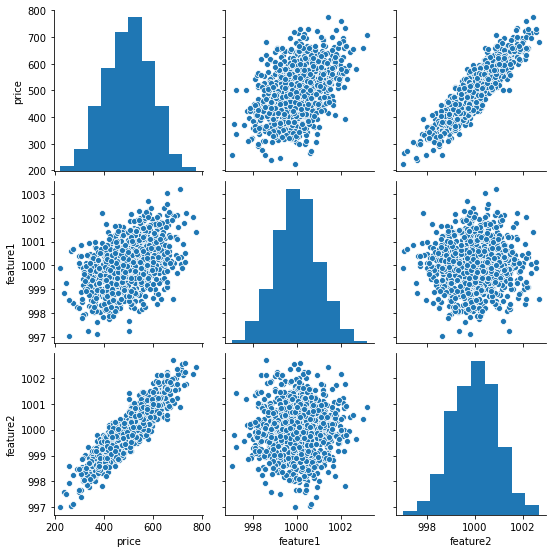

In [26]:
sns.pairplot(df)

### Step 2. Create a test train split 

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X = df[['feature1','feature2']].values 
# becuase of the way TensorFlow works we actually pass in numpy arrays
# instead of pandas dataframe 
# so we can add .values to the end of a data frame to return a numpy 
# arrays 

y=df['price'].values 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, #30% of my data will use for test set
                                                     random_state=42) # repeat the actual results of the split the same everytime, 
                                                     # then set the random state to a specific number 

In [31]:
X_train.shape # 70 percent in the train set 

(700, 2)

In [32]:
X_test.shape # 30 percent in the test set 

(300, 2)

### Step 3. Normalize and scale our feature data

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
#help(MinMaxScaler)

In [36]:
scaler = MinMaxScaler()

In [37]:
scaler.fit(X_train) # we only run it on the training set b/c we want to 
# prevent what's known as leakage from the test set. 
# We don't want to assume that we have prior information of the test set. 

MinMaxScaler()

In [38]:
X_train = scaler.transform(X_train)

In [40]:
X_test = scaler.transform(X_test)

### Step 4. Create our neural network

In [41]:
# We set up a base sequential model and then keep adding layers to it.
# In this case we'll add a simple dense layer. 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [69]:
# Another way (preferred way!!)

model = Sequential()

model.add(Dense(4,activation='relu'))# we want the first layer to be 4 neurons
# densely connected meaning every neuron connected to every other neuron 
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1)) # last layer don't need an activation 
# We want the last layer only contains one neuron that could predict 
# the price 

model.compile(optimizer='rmsprop',loss='mse')

In [71]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [72]:
model.fit(x=X_train, # x: what are the features that we're training on
          y=y_train, # y: the actual training labels that correspond to those training feature points 
         epochs = 250) # epochs=1 means we've gone through the entire dataset one time 

Epoch 1/250
22/22 [==============================] - 0s 643us/step - loss: 258636.3234
Epoch 2/250
22/22 [==============================] - 0s 607us/step - loss: 255991.3322
Epoch 3/250
22/22 [==============================] - 0s 611us/step - loss: 256080.6332
Epoch 4/250
22/22 [==============================] - 0s 605us/step - loss: 256931.7283
Epoch 5/250
22/22 [==============================] - 0s 621us/step - loss: 257855.0102
Epoch 6/250
22/22 [==============================] - 0s 600us/step - loss: 261395.5958
Epoch 7/250
22/22 [==============================] - 0s 569us/step - loss: 246091.7656
Epoch 8/250
22/22 [==============================] - 0s 560us/step - loss: 251228.3105
Epoch 9/250
22/22 [==============================] - 0s 571us/step - loss: 256688.7364
Epoch 10/250
22/22 [==============================] - 0s 555us/step - loss: 256021.6624
Epoch 11/250
22/22 [==============================] - 0s 570us/step - loss: 252926.0516
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 644us/step - loss: 40272.4813
Epoch 95/250
22/22 [==============================] - 0s 636us/step - loss: 37583.0477
Epoch 96/250
22/22 [==============================] - 0s 615us/step - loss: 33505.2848
Epoch 97/250
22/22 [==============================] - 0s 603us/step - loss: 30237.2304
Epoch 98/250
22/22 [==============================] - 0s 601us/step - loss: 24813.6551
Epoch 99/250
22/22 [==============================] - 0s 601us/step - loss: 22056.2418
Epoch 100/250
22/22 [==============================] - 0s 601us/step - loss: 18316.1477
Epoch 101/250
22/22 [==============================] - 0s 612us/step - loss: 15700.3793
Epoch 102/250
22/22 [==============================] - 0s 606us/step - loss: 12830.3202
Epoch 103/250
22/22 [==============================] - 0s 603us/step - loss: 10183.8891
Epoch 104/250
22/22 [==============================] - 0s 596us/step - loss: 8552.5759
Epoch 105/250
22/22 [==============================]

22/22 [==============================] - 0s 553us/step - loss: 275.7450
Epoch 189/250
22/22 [==============================] - 0s 586us/step - loss: 267.3776
Epoch 190/250
22/22 [==============================] - 0s 582us/step - loss: 247.3146
Epoch 191/250
22/22 [==============================] - 0s 581us/step - loss: 229.2706
Epoch 192/250
22/22 [==============================] - 0s 552us/step - loss: 219.7933
Epoch 193/250
22/22 [==============================] - 0s 530us/step - loss: 221.8862
Epoch 194/250
22/22 [==============================] - 0s 526us/step - loss: 214.3226
Epoch 195/250
22/22 [==============================] - 0s 532us/step - loss: 193.4518
Epoch 196/250
22/22 [==============================] - 0s 545us/step - loss: 188.5809
Epoch 197/250
22/22 [==============================] - 0s 536us/step - loss: 192.2770
Epoch 198/250
22/22 [==============================] - 0s 528us/step - loss: 168.6221
Epoch 199/250
22/22 [==============================] - 0s 527us/step

In [73]:
# Plot the training history 
loss_df = pd.DataFrame(model.history.history)

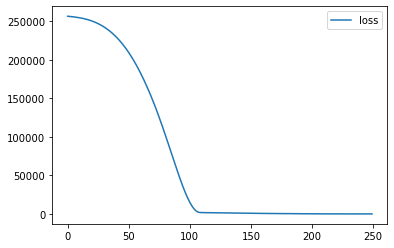

In [74]:
loss_df.plot()

### Step 5. Model Evaluation

In [75]:
model.evaluate(X_test, y_test, verbose=0)

25.30872344970703

In [76]:
model.evaluate(X_train, y_train, verbose=0)

24.430557250976562

In [87]:
test_predictions = model.predict(X_test)

In [88]:
# We convert numpy array to pandas series, and then reshape it 
test_predictions = pd.Series(test_predictions.reshape(300,))

In [89]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [90]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [92]:
pred_df.columns = ['Test True Y','Model Predictions']

In [93]:
pred_df

,Test True Y,Model Predictions
0,402.296319,405.672699
1,624.156198,622.640747
2,582.455066,591.299438
3,578.588606,571.898010
4,371.224104,367.741821
...,...,...
295,525.704657,528.931030
296,502.909473,515.909058
297,612.727910,608.776001
298,417.569725,417.027313


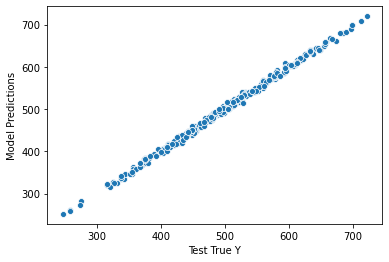

In [94]:
# Create a scatter plot based on pred_df
sns.scatterplot(x='Test True Y', y='Model Predictions',data=pred_df)

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [98]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [96]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])
# we are on average off by 4 dollars 

4.059674581635799

In [97]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.308728327951314

In [101]:
root_mean_square_error = mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5
root_mean_square_error

5.030778103628832

### Step 6. Predicting on brand new model 

In [102]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [103]:
# Don't forget to scale!
new_gem = scaler.transform(new_gem)

In [104]:
model.predict(new_gem)

array([[420.46384]], dtype=float32)

### Step 7. Save and load a model

In [105]:
from tensorflow.keras.models import load_model

In [106]:
model.save('my_gem_model.h5')

In [107]:
later_model = load_model('my_gem_model.h5')

In [108]:
later_model.predict(new_gem)

array([[420.46384]], dtype=float32)

## 137. TF Regression Code Along

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('TensorFlow_FILES/DATA/kc_house_data.csv')

### Step 1. Exploratory Data Analysis

In [113]:
# How many missing data we have? 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [187]:
# Get statistical data of our data set. 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.007547,0.086549,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,0.234292,0.766390,0.0000,0.0000,0.0000,0.000,4.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


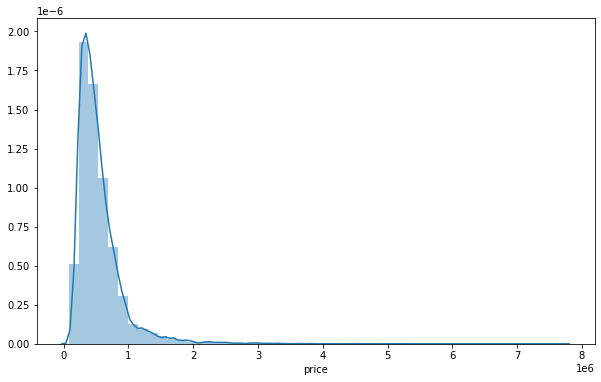

In [117]:
# we can find the distribution of the actual label. It is very useful 
# especially for continuous labels. 

plt.figure(figsize=(10,6))
sns.distplot(df['price'])

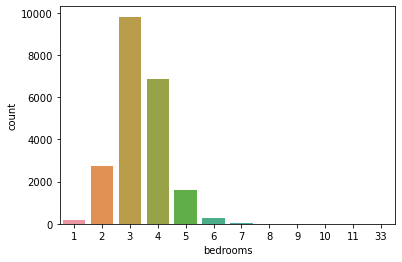

In [118]:
# Bedroom numbers 
sns.countplot(df['bedrooms'])

In [121]:
# Check the correlation relationship between our label price and other 
# features. 
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

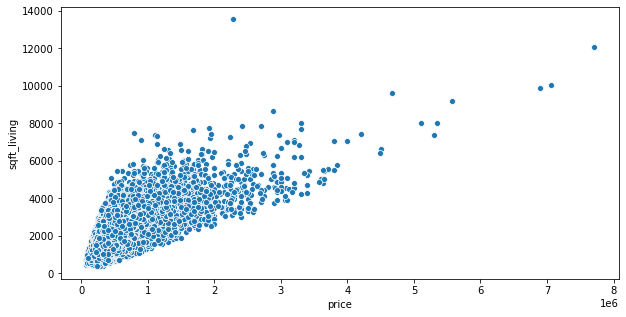

In [123]:
# Compare our label to features that we believe has a high correlation
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

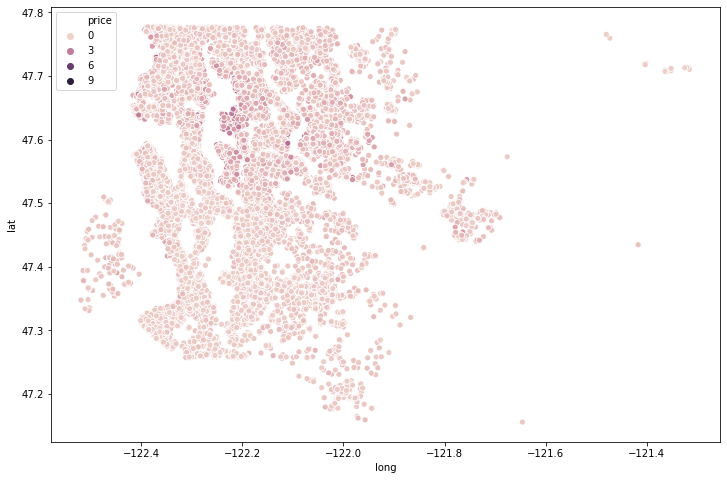

In [126]:
# Check the lattitude and longtitude features vs. house price 
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')
# Because of the presence of outliers（very expensive houses), the map 
# doesn't show obvious gradiant according to price. 
# So we want to drop top outliers first 

In [128]:
# Check the outliers: the most expensive 20 houses
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [129]:
len(df)*0.01

215.97

In [130]:
# Create a new data frame and only grab the 99 percent bottom of houses
# We are dropping very expensive outlier houses. 
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

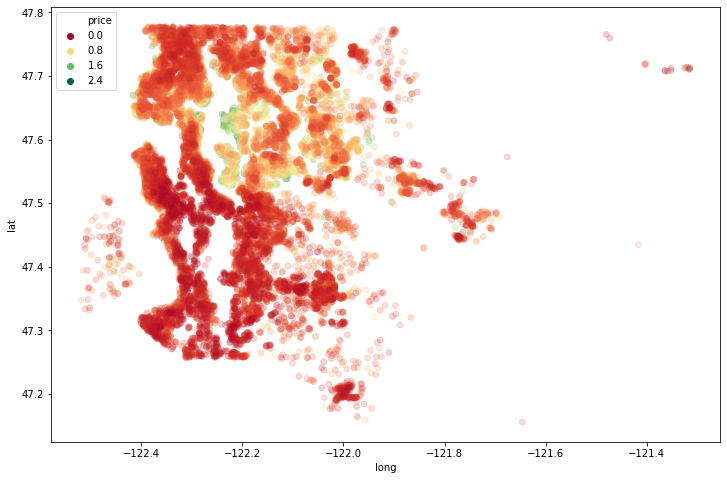

In [132]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,
                edgecolor=None, alpha = 0.2, palette='RdYlGn',hue='price')

### Step 2. Feature Engineering from our original data

In [133]:
df = df.drop('id',axis=1) # ID is just the specific ID for each house. 

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [138]:
# Since the date info is unnessessary, we only grab year and month. 
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

#### Same thing with lambda

    # def year_extraction(date):
          return date.year

In [140]:
df.head() # now date columns has been organized, and year, month columns 
# were added 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


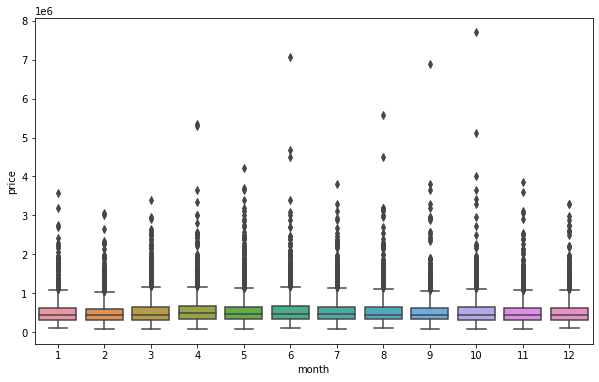

In [141]:
# Check if there is any variation based on the month that the house was sold. 
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

In [148]:
# Check the mean price of month that the house was sold 
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

In [152]:
df = df.drop(['zipcode','date'],axis=1) # drop the date and zipcode columns since as we explored, they 
# are not useful for our future analysis

### Step 3. Scaling, and train, test, split

In [153]:
X = df.drop('price',axis=1).values
y = df['price'].values
# .values will return numpy array 

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                     random_state=101) 

In [156]:
from sklearn.preprocessing import MinMaxScaler

In [157]:
scaler = MinMaxScaler()

In [158]:
# Scale and transform in one step
X_train = scaler.fit_transform(X_train)

In [159]:
X_test = scaler.transform(X_test) # we only transform our test data

### Step 4. Create the model and train the model 

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [161]:
X_train.shape # check the shape 
# we see there are 19 incoming features - 19 neurons in our layer

(15117, 19)

In [162]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [163]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test,y_test), # as we go along we want to check against our test set to help us know whether or not we're overfitting 
         batch_size=128, # very typical to do batch size in powers of 2. Smaller batch size, longer training time, less likely to overfit our data
         epochs=400) 

Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 429094540356.2667 - val_loss: 418939764736.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 407890904132.2667 - val_loss: 416793034752.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 424624671812.2667 - val_loss: 396392562688.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 377796466005.3333 - val_loss: 311509778432.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 274090881160.5333 - val_loss: 160862748672.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 151111063688.5333 - val_loss: 97409073152.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 107816477013.3333 - val_loss: 94228807680.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 96468780953.6000 - val_loss: 92752396288.0000
Epoch 9/400
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 40194691379.2000 - val_loss: 36361543680.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 36356503808.0000 - val_loss: 36206518272.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 38325280494.9333 - val_loss: 36067979264.0000
Epoch 71/400
119/119 [==============================] - 0s 949us/step - loss: 36910121830.4000 - val_loss: 35934744576.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 39762575428.2667 - val_loss: 35786489856.0000
Epoch 73/400
119/119 [==============================] - 0s 995us/step - loss: 36939226180.2667 - val_loss: 35654258688.0000
Epoch 74/400
119/119 [==============================] - 0s 976us/step - loss: 35972166024.5333 - val_loss: 35528249344.0000
Epoch 75/400
119/119 [==============================] - 0s 989us/step - loss: 35202264866.1333 - val_loss: 35431002112.0000
Epoch 76/400
119/119 [=======

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 31966919475.2000 - val_loss: 31566006272.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 33337984768.0000 - val_loss: 31473745920.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 34029744145.0667 - val_loss: 31423670272.0000
Epoch 138/400
119/119 [==============================] - 0s 973us/step - loss: 32632659899.7333 - val_loss: 31414820864.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 31626582630.4000 - val_loss: 31387297792.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 32963983394.1333 - val_loss: 31307646976.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 31663977250.1333 - val_loss: 31364005888.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 30825482547.2000 - val_loss: 31267606528.0000
Epoch 143/400


119/119 [==============================] - 0s 1ms/step - loss: 30543052697.6000 - val_loss: 29832230912.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 31809905920.0000 - val_loss: 29684146176.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 30202870118.4000 - val_loss: 29682745344.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 30681160618.6667 - val_loss: 29640656896.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 31441172428.8000 - val_loss: 29629110272.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 32078262528.0000 - val_loss: 29625214976.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 29773998609.0667 - val_loss: 29561935872.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 32976246596.2667 - val_loss: 29607372800.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 31208223419.7333 - val_loss: 28729819136.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 30787028172.8000 - val_loss: 28734568448.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 28874950946.1333 - val_loss: 28846956544.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 28815704268.8000 - val_loss: 28757882880.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 30234021939.2000 - val_loss: 28667713536.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 31330679842.1333 - val_loss: 28619806720.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 30175999539.2000 - val_loss: 28753543168.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 32344712823.4667 - val_loss: 28687429632.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 28498030813.8667 - val_loss: 28009426944.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 30586364706.1333 - val_loss: 27901609984.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 28680802286.9333 - val_loss: 27926589440.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 29815870822.4000 - val_loss: 27876085760.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 30044817937.0667 - val_loss: 27855169536.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 30813616810.6667 - val_loss: 27870633984.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 31496505821.8667 - val_loss: 27843393536.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 29133427054.9333 - val_loss: 27924457472.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29138484676.2667 - val_loss: 27100639232.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 30506215953.0667 - val_loss: 27063529472.0000


In [166]:
losses = pd.DataFrame(model.history.history)

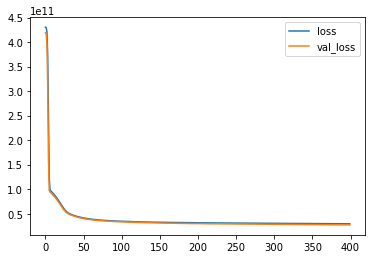

In [167]:
losses.plot()
# if we see the val_loss began to go up and up after some of epochs,
# that means we overfit the training data 

### Step 5. Evaluation on test data 

In [168]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [169]:
predictions = model.predict(X_test)

In [171]:
# root mean squared error
np.sqrt(mean_squared_error(y_test,predictions))

164509.97123775416

In [172]:
mean_absolute_error(y_test,predictions)

101750.81934437693

In [173]:
df['price'].describe()
# Compare with mean price, we find that our prediction is off by ~20%

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [174]:
# Use explained variance score to try to get a deeper understanding of our evaluation 
explained_variance_score(y_test,predictions)

0.796115607561691

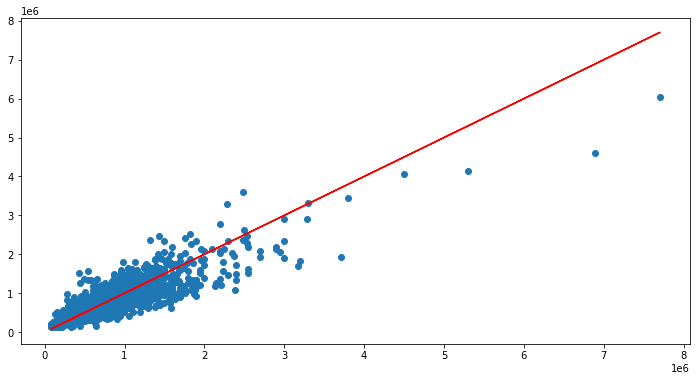

In [177]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r') # draw the perfect prediction line 

### Step 6. Predict the price of a brand new house

In [194]:
single_house = df.drop('price',axis=1).iloc[0]
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [182]:
# Scale this single house data 
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [183]:
model.predict(single_house)

array([[286992.5]], dtype=float32)

In [195]:
df.head(1)['price']

0    221900.0
Name: price, dtype: float64

## 141. TensorFlow Classification 

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [197]:
df = pd.read_csv('TensorFlow_FILES/DATA/cancer_classification.csv')

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [201]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [202]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Step 1. Explortory Data analysis

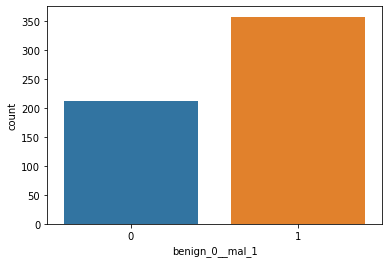

In [204]:
# For classification task, it's always a good idea to do a count plot of 
# our actual label to see the number of instances per label,and see if it's
# a well balanced problem or not. 

sns.countplot(x='benign_0__mal_1',data=df)

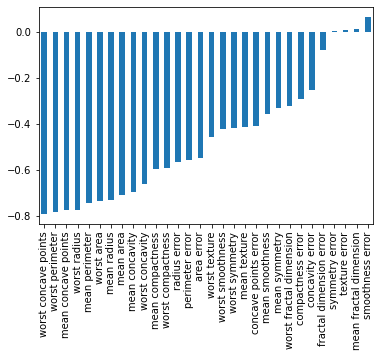

In [210]:
# Check the correaltion between features and our label. 
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar') # grab 
# everything but the last column 

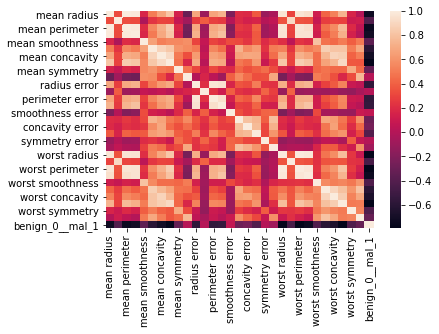

In [212]:
# Check the correlation between feature themselves 
sns.heatmap(df.corr())

### Step 2. Train test split

In [215]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

### Step 3. Scale our data

In [218]:
from sklearn.preprocessing import MinMaxScaler

In [219]:
scaler = MinMaxScaler()

In [220]:
X_train = scaler.fit_transform(X_train)

In [221]:
X_test = scaler.transform(X_test)

### Step 4. Create the model 

In [222]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [224]:
X_train.shape

(426, 30)

In [225]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
# In binary classification problem, we want the last activation to be 
# sigmoid 
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

### Step 5. Train the model 

In [226]:
# Choose too many epochs and overfit!
model.fit(x=X_train, y=y_train, epochs=600,
         validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.7181 - val_loss: 0.6952
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6865 - val_loss: 0.6659
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6553 - val_loss: 0.6353
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6235 - val_loss: 0.6013
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5853 - val_loss: 0.5615
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5452 - val_loss: 0.5168
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4977 - val_loss: 0.4637
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4445 - val_loss: 0.4124
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4105 - val_loss: 0.3689
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3580 - val_loss: 0.3331
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0687 - val_loss: 0.0909
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0820 - val_loss: 0.0874
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0477 - val_loss: 0.0971
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0571 - val_loss: 0.0936
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0502 - val_loss: 0.0933
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0568 - val_loss: 0.0964
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0485 - val_loss: 0.0928
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0567 - val_loss: 0.0893
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0445 - val_loss: 0.0978
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0713 - val_loss: 0.0929
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.1049
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0346 - val_loss: 0.1051
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0302 - val_loss: 0.1159
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0414 - val_loss: 0.1002
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0423 - val_loss: 0.1086
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0488 - val_loss: 0.0964
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0496 - val_loss: 0.1192
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0362 - val_loss: 0.1061
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0445 - val_loss: 0.1052
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.1037
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0310 - val_loss: 0.1280
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0354 - val_loss: 0.1305
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0322 - val_loss: 0.1366
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0348 - val_loss: 0.1204
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0272 - val_loss: 0.1307
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0336 - val_loss: 0.1286
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0377 - val_loss: 0.1249
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0264 - val_loss: 0.1365
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0313 - val_loss: 0.1245
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.1329
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0311 - val_loss: 0.1428
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0234 - val_loss: 0.1607
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.1556
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0328 - val_loss: 0.1423
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.1423
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.1553
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.1657
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0205 - val_loss: 0.1465
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0273 - val_loss: 0.1557
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0267 - val_loss: 0.1585
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0192 - val_loss: 0.1842
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.1718
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.1898
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0253 - val_loss: 0.1822
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.1647
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0206 - val_loss: 0.1771
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0205 - val_loss: 0.1599
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0265 - val_loss: 0.1800
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0231 - val_loss: 0.1654
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 0.1814
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.2019
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0147 - val_loss: 0.1907
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0145 - val_loss: 0.2046
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0144 - val_loss: 0.2065
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.1952
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0144 - val_loss: 0.2058
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0171 - val_loss: 0.2083
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.1971
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.2078
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0139 - val_loss: 0.2109
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.2356
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.2273
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.2683
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.2037
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.2419
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.2297
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0124 - val_loss: 0.2137
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.2675
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.2032
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.3100
Epoc

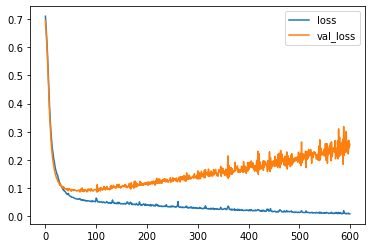

In [228]:
# Plot out both the training loss and the validation loss
losses = pd.DataFrame(model.history.history)
losses.plot()

### Step 6. Crate a better model by adding early stopping and dropout layer

**Add Early Stopping**

In [229]:
# Our model again 

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
# In binary classification problem, we want the last activation to be 
# sigmoid 
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [230]:
from tensorflow.keras.callbacks import EarlyStopping

In [231]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [233]:
# Use early stopping: 
# Step one: define the variable 
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=25)
#In "min" mode,training will stop when the quantity monitored has stopped decreasing; 
#In "max" mode it will stop when the quantity monitored has stopped increasing; 
#In "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
# patience=25 means we'll wait 25 epochs after we've detected a stopping point b/c noise may occur 


In [234]:
# Step two: apply early stop 
model.fit(x=X_train, y=y_train, epochs=600,validation_data = (X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6876 - val_loss: 0.6584
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6533 - val_loss: 0.6290
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6110 - val_loss: 0.5958
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5803 - val_loss: 0.5576
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5489 - val_loss: 0.5101
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5099 - val_loss: 0.4498
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4359 - val_loss: 0.3958
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3891 - val_loss: 0.3479
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3345 - val_loss: 0.3100
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3147 - val_loss: 0.2767
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0660 - val_loss: 0.0944
Epoch 00083: early stopping


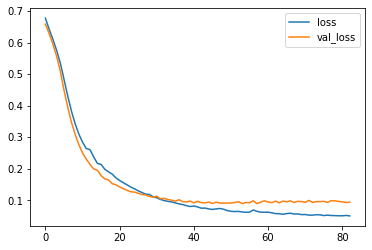

In [235]:
#Plot out training loss and the validation loss again
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

**Add dropout layer**

In [236]:
# Another thing we can do to help prevent overfitting is add in dropout layers
# It will turn off a percentage of neurons randomly

from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) # half the neurons during each batch in the layer of 30 are going to be turned off randomly 

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [237]:
model.fit(x=X_train, y=y_train, epochs=600,validation_data = (X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6634 - val_loss: 0.6418
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6758 - val_loss: 0.6214
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6475 - val_loss: 0.6024
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6463 - val_loss: 0.5820
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6090 - val_loss: 0.5600
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6082 - val_loss: 0.5389
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5975 - val_loss: 0.5172
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5583 - val_loss: 0.4907
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5450 - val_loss: 0.4597
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5284 - val_loss: 0.4250
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0920 - val_loss: 0.0972
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1150 - val_loss: 0.0977
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1131 - val_loss: 0.1091
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1084 - val_loss: 0.1024
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0924 - val_loss: 0.0999
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1008 - val_loss: 0.1045
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1101 - val_loss: 0.1007
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1116 - val_loss: 0.1048
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1413 - val_loss: 0.1008
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1070 - val_loss: 0.1093
Epoch 93/600


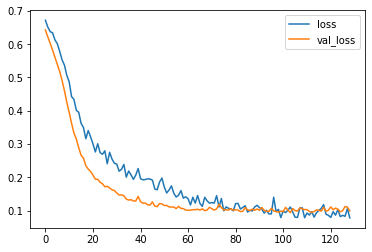

In [238]:
# Plot out training loss and the validation loss, it is improved by adding 
# early stopping and dropout layers 
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Step 7. Model Evaluation 

In [239]:
predictions = model.predict_classes(X_test)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [240]:
from sklearn.metrics import classification_report,confusion_matrix

In [242]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[54  1]
 [ 0 88]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.99      1.00      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

